# 4.1 - Data Cleaning 2


![cleaning2](images/data_cleaning_cycle.avif)

# Ejemplo 1 - Airbnb data


En esta limpieza nos centraremos en tres conceptos:

+ Valores nulos.
+ Datos inconsistentes 
+ Valores atípicos (Outliers)

Primero importamos librerias y los datos.

In [1]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [3]:
# se cargan los datos

airbnb_ori=pd.read_csv('../data/AB_NYC_2019.csv')

airbnb=airbnb_ori.copy()

airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**EDA**

Se comienza la exploracion de los datos.

In [4]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [5]:
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Columnas numericas**

In [6]:
num_df=airbnb.select_dtypes(exclude='object')

num_df.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

**Columnas categoricas**

In [7]:
cat_df=airbnb.select_dtypes(include='object')

cat_df.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

## Valores Nulos

In [8]:
nan_cols=airbnb.isna().sum()   # serie con indice las columnas y valores los nulos

nan_cols[nan_cols>0]

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [9]:
nan_cols=airbnb.isna().mean() * 100

nan_cols[nan_cols>0]

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

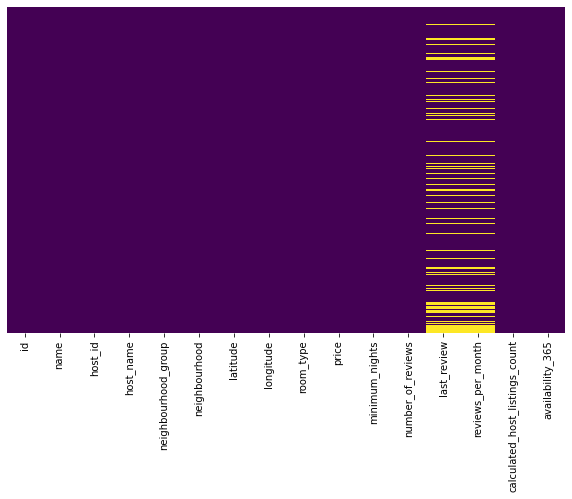

In [10]:
# grafico de nulos en el dataframe

plt.figure(figsize=(10, 6))

sns.heatmap(airbnb.isna(), # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show();

In [11]:
def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols=airbnb.isna().mean() * 100

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))

    sns.heatmap(airbnb.isna(), # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show();

'N nan cols: 4'

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

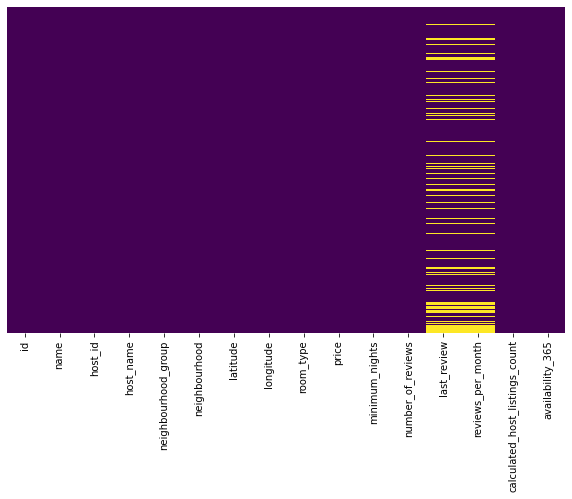

In [12]:
check_nan(airbnb)

**¿Qué hacemos con estos valores?**

In [13]:
# podemos borrar algunas columnas

cols=['id', 'host_id', 'host_name']

airbnb.drop(cols, axis=1, inplace=True)

In [14]:
airbnb['price'].isna().sum()

0

In [15]:
# borrar borrar filas con nulos en cierta columna

airbnb['price'].dropna(inplace=True)

In [16]:
# borrar borrar filas con nulos en varias columnas a la vez

airbnb.dropna(inplace=True, subset=['price', 'latitude', 'longitude'])

In [17]:
# rellenar con la media

airbnb['price'].fillna(airbnb['price'].mean() , inplace=True)

In [18]:
# rellenar con la mediana

airbnb['price'].fillna(airbnb['price'].median() , inplace=True)

In [19]:
# backward/forward fill, normalmente para series temporales

airbnb['price'].bfill()
airbnb['price'].ffill().head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [20]:
# podemos rellenar en un subconjunto de columnas

#airbnb.fillna({'reviews_per_month': 0, 'name': 'unknown'}, inplace=True)

In [22]:
#airbnb.fillna(dict(zip(nan_cols[nan_cols>0].index, ['unknown'])), inplace=True)

In [21]:
nan_cols=airbnb.isna().mean() * 100

nan_cols[nan_cols>0]

name                  0.032723
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

In [25]:
nan_cols[nan_cols>0].index  # lista con el nombre de las columnas que tienen nulos

Index(['name', 'last_review', 'reviews_per_month'], dtype='object')

In [26]:
# lista de valores para rellenar

lst=['unknown', 'None', 0]

In [30]:
dictio=dict(zip(nan_cols[nan_cols>0].index, lst))  # diccionario para rellenar diferente columnas

dictio

{'name': 'unknown', 'last_review': 'None', 'reviews_per_month': 0}

In [31]:
airbnb.fillna(dictio, inplace=True)

**para categorias, una estragia puede ser rellenar con el valor mas frecuente**

'N nan cols: 0'

Series([], dtype: float64)

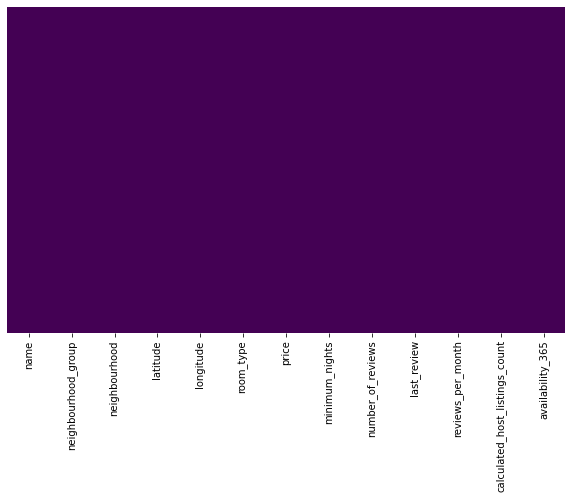

In [32]:
check_nan(airbnb)

## Datos inconsistentes 


**Fechas**

**Arreglando errores en strings**

**ejemplo:** Busqueda de filas que contengan una palabra clave

**Cambio del tipo de dato, optimizacion de memoria**

## Outliers

**depende del contexto**

# Ejemplo 2 - House Data


**Cargamos los datos**

**EDA**

**Columnas numericas**

**Columnas categoricas**

## Valores Nulos